# Anomaly-detection-with-Isolation-Forest

## Getting ready

In [ ]:
# pip install matplotlib pandas scipy

1. Import the required libraries and set a random seed:

In [13]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

2. Generate a set of normal observations, to be used as training data

In [15]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x","y"])

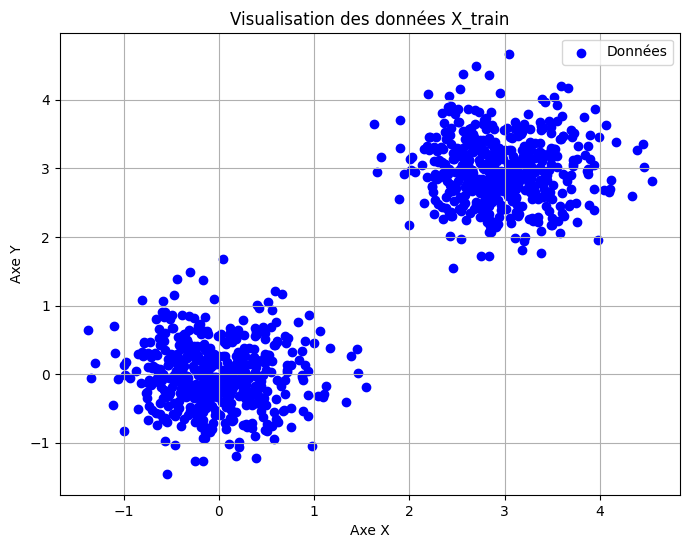

In [16]:
import matplotlib.pyplot as plt

# Assurez-vous d'avoir importé les bibliothèques nécessaires (numpy et pandas) et généré X_train comme vous l'avez décrit précédemment

# Tracer les données
plt.figure(figsize=(8, 6))
plt.scatter(X_train["x"], X_train["y"], color='blue', label='Données')
plt.title('Visualisation des données X_train')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.legend()
plt.grid(True)
plt.show()


3. Generate a testing set, also consisting of normal observations:

In [17]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

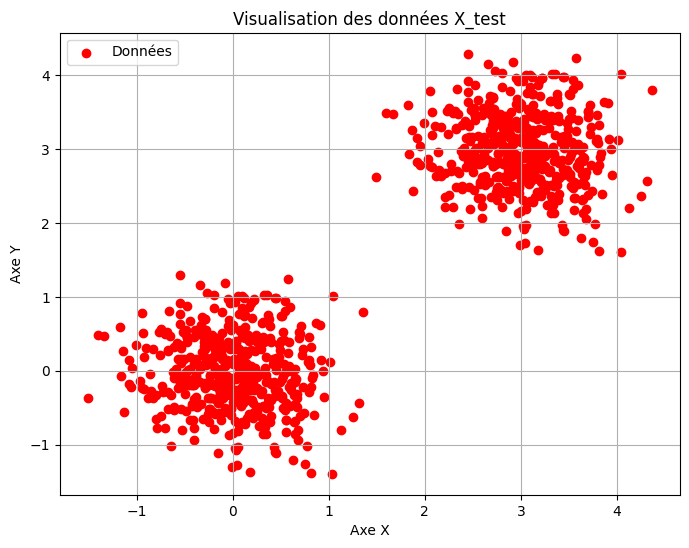

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test["x"], X_test["y"], color='red', label='Données')
plt.title('Visualisation des données X_test')
plt.xlabel('Axe X')
plt.ylabel('Axe Y')
plt.legend()
plt.grid(True)
plt.show()

4. Generate a set of outlier observations. These are generated from a different distribution than the normal observations.

In [22]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

5. Let's take a look at the data we have générated:

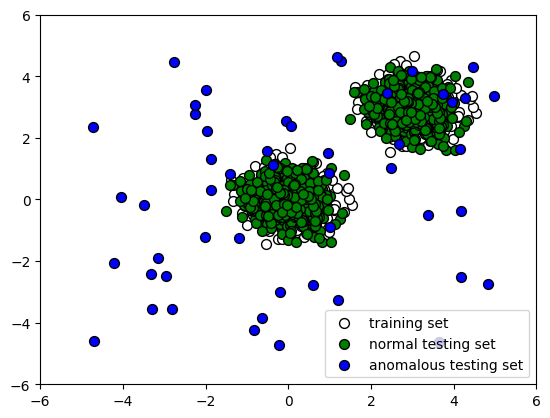

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolors="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s = 50, edgecolors="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s = 50, edgecolors="black")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend([p1, p2, p3],
           ["training set", "normal testing set", "anomalous testing set"],
           loc="lower right",
           )
plt.show()

6. Now train an Isolation Forest model on our training data:

In [31]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outlier = clf.predict(X_outliers)

7. Let's see how the algorithm performs. Append the label to `X_outliers`:

In [34]:
X_outliers = X_outliers.assign(pred=y_pred_outlier)
X_outliers.head()

,x,y,pred
0,-2.951212,-2.486771,-1
1,-0.043497,2.553353,-1
2,-4.036031,0.087572,-1
3,1.278253,4.487460,-1
4,0.983748,0.847475,-1


8. Let's plot the Isolation Forest predictions on the outliers to see how many it caught: